# XOR Binary Classification without(and with) Hidden layer


| $X$ | $y$  |
|:---:|:---:|
|  (0,0) | 0  |
|  (0,1) | 1  |
|  (1,0) | 1  |
|  (1,1) | 0  |


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

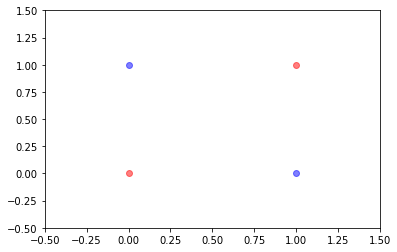

In [2]:
x_data = [[0,0],
          [0,1],
          [1,0],
          [1,1]]

y_data = [[0],
         [1],
         [1],
         [0]]

plt.xlim(-0.5,1.5)
plt.ylim(-0.5,1.5)

for i, j in enumerate(y_data):
    if j == [0] : 
        _ = plt.plot(x_data[i][0], x_data[i][1], "ro", alpha=0.5)
    else :
        _ = plt.plot(x_data[i][0], x_data[i][1], "bo", alpha=0.5)

In [3]:
# Logistic regression model

X = tf.placeholder(tf.float32, shape=[None,2])
Y = tf.placeholder(tf.float32, shape=[None,1])

H = tf.layers.dense(X, 1, activation=tf.nn.sigmoid)

loss = - tf.reduce_mean(Y * tf.log(H) + (1 - Y) * tf.log(1 - H))
train = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(loss)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(H > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

Step : 50, Cost : 0.6945607  Accuracy : 0.5
Step : 100, Cost : 0.69332224  Accuracy : 0.5
Step : 150, Cost : 0.6931704  Accuracy : 0.75
Step : 200, Cost : 0.69315034  Accuracy : 0.75
Step : 250, Cost : 0.69314766  Accuracy : 0.75
Step : 300, Cost : 0.69314724  Accuracy : 0.75
Step : 350, Cost : 0.6931472  Accuracy : 0.75
Step : 400, Cost : 0.6931472  Accuracy : 0.75
Step : 450, Cost : 0.6931472  Accuracy : 0.75
Step : 500, Cost : 0.6931472  Accuracy : 0.75


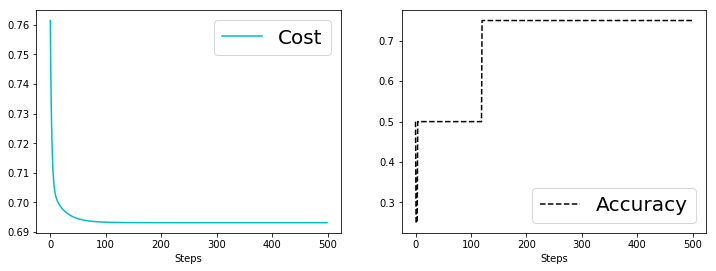

In [4]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

cost_list = []
acc_list = []

iteration = 500
for step in range(iteration):
    acc, cost, _, = sess.run([accuracy, loss,  train], feed_dict={X: x_data, Y: y_data})
    cost_list.append(cost)
    acc_list.append(acc)
    if (step+1) % (iteration//10) ==0:
        print("Step : %i, Cost : %s  Accuracy : %s" %(step+1, cost, acc)) 

plt.figure(figsize=(12,9))     
plt.subplot(221)
plt.xlabel("Steps")
_ = plt.plot(cost_list, "c", label='Cost')
_ = plt.legend(fontsize=20)

plt.subplot(222)
plt.xlabel("Steps")
_ = plt.plot(acc_list, "k--", label='Accuracy')
_ = plt.legend(fontsize=20)

# 'XOR' Problem의 경우 Hidden layer가 없는 하나의 Perceptron으로는 해결 불가능

다음과 같이 `Hidden layer`를 추가해서 모델 구성을 한다.

![](data/binary2.png)

Step : 100, Cost : 0.6936052  Accuracy : 0.5
Step : 200, Cost : 0.692556  Accuracy : 0.5
Step : 300, Cost : 0.68978477  Accuracy : 0.5
Step : 400, Cost : 0.6735079  Accuracy : 0.75
Step : 500, Cost : 0.62535995  Accuracy : 0.75
Step : 600, Cost : 0.56177455  Accuracy : 0.75
Step : 700, Cost : 0.5020382  Accuracy : 0.75
Step : 800, Cost : 0.41090733  Accuracy : 0.75
Step : 900, Cost : 0.26170206  Accuracy : 1.0
Step : 1000, Cost : 0.15259853  Accuracy : 1.0


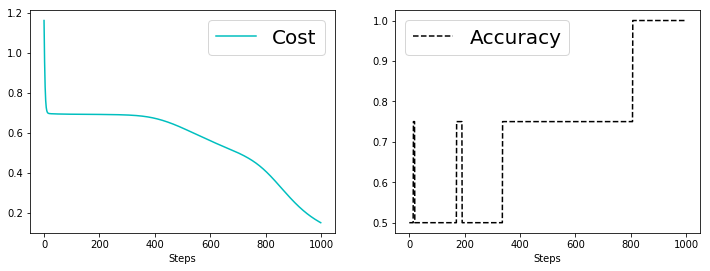

In [5]:
X = tf.placeholder(tf.float32, shape=[None,2])
Y = tf.placeholder(tf.float32, shape=[None,1])

W0 = tf.Variable(tf.random_normal([2,2]), dtype=tf.float32)
b0 = tf.Variable(tf.random_normal([2]), dtype=tf.float32)

H0 = tf.nn.sigmoid(tf.matmul(X,W0)+b0)

W1 = tf.Variable(tf.random_normal([2,1]), dtype=tf.float32)
b1 = tf.Variable(tf.random_normal([1]), dtype=tf.float32)

H = tf.sigmoid(tf.matmul(H0,W1)+b1)

loss = - tf.reduce_mean(Y * tf.log(H) + (1 - Y) * tf.log(1 - H))
train = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(loss)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(H > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

cost_list = []
acc_list = []

iteration = 1000
for step in range(iteration):
    acc, cost, _, = sess.run([accuracy, loss,  train,],
                             feed_dict={X: x_data, Y: y_data})
    cost_list.append(cost)
    acc_list.append(acc)
    if (step+1) % (iteration//10) ==0:
        print("Step : %i, Cost : %s  Accuracy : %s" %(step+1, cost, acc)) 

plt.figure(figsize=(12,9))     
plt.subplot(221)
plt.xlabel("Steps")
_ = plt.plot(cost_list, "c", label='Cost')
_ = plt.legend(fontsize=20)

plt.subplot(222)
plt.xlabel("Steps")
_ = plt.plot(acc_list, "k--", label='Accuracy')
_ = plt.legend(fontsize=20)